In [ ]:
!gdown 1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42

Downloading...
From: https://drive.google.com/uc?id=1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42
To: /content/TRAIN.csv
100% 9.33M/9.33M [00:00<00:00, 32.2MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('TRAIN.csv')

In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


Insights:
1. Total Rows: 188,340
2. Total Columns: 10
3. No Missing Values: All columns have 188,340 non-null entries.
4. Date : Should be converted to datetime for time-based analysis.
5. Store_id : Should be converted to category as it is categorical identifier.
6. Discount : Can be converted to integer datatype for model training.
7. #Order : Name is suggested to be changed to No_of_orders.

In [ ]:
df.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [ ]:
df.nunique()

,0
ID,188340
Store_id,365
Store_Type,4
Location_Type,5
Region_Code,4
Date,516
Holiday,2
Discount,2
#Order,299
Sales,47422


In [ ]:

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert the following columns to categorical
categorical_columns = ['Store_id', 'Store_Type', 'Location_Type', 'Region_Code',"Holiday","Discount"]
df[categorical_columns] = df[categorical_columns].astype('category')


In [ ]:
df.rename(columns={'#Order': 'No_of_orders'}, inplace=True)

### **Univariate Analysis**

In [ ]:
# View value counts for each categorical column
for col in ['Store_id', 'Store_Type', 'Location_Type', 'Region_Code','Holiday','Discount']:
    print(f"\nValue counts for {col}:\n")
    print(round(df[col].value_counts(normalize= True)*100,2))



Value counts for Store_id:

Store_id
365    0.27
1      0.27
2      0.27
3      0.27
4      0.27
       ... 
18     0.27
17     0.27
16     0.27
15     0.27
14     0.27
Name: proportion, Length: 365, dtype: float64

Value counts for Store_Type:

Store_Type
S1    47.12
S4    24.38
S2    15.34
S3    13.15
Name: proportion, dtype: float64

Value counts for Location_Type:

Location_Type
L1    45.21
L2    25.75
L3    15.89
L5     7.40
L4     5.75
Name: proportion, dtype: float64

Value counts for Region_Code:

Region_Code
R1    33.97
R2    28.77
R3    23.56
R4    13.70
Name: proportion, dtype: float64

Value counts for Holiday:

Holiday
0    86.82
1    13.18
Name: proportion, dtype: float64

Value counts for Discount:

Discount
No     55.25
Yes    44.75
Name: proportion, dtype: float64


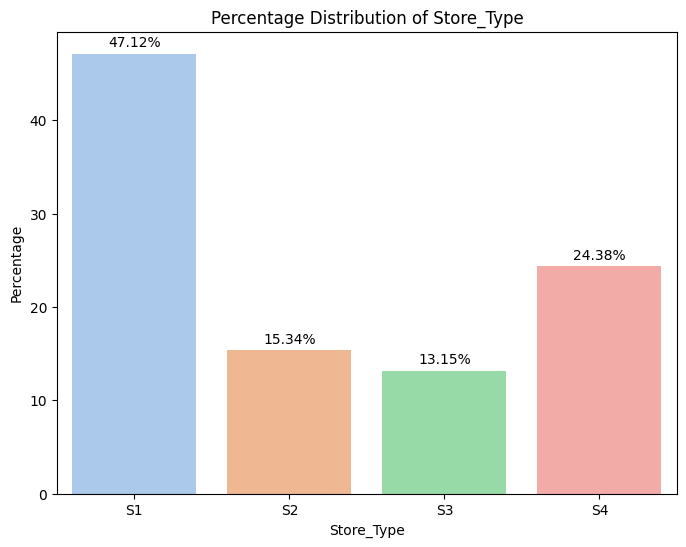

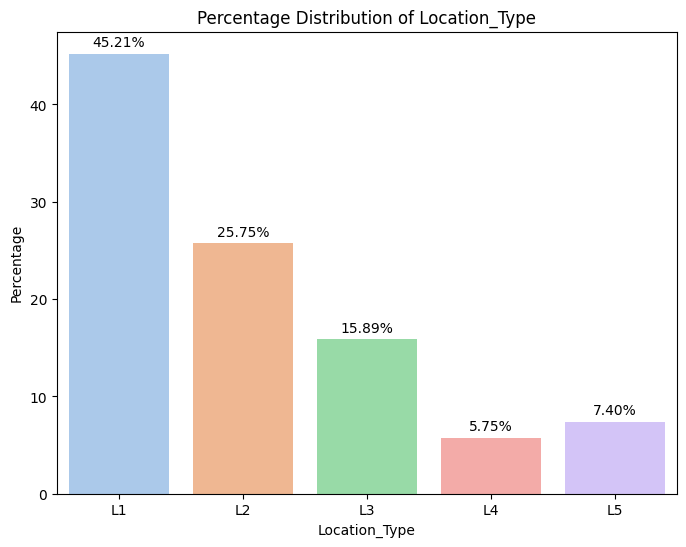

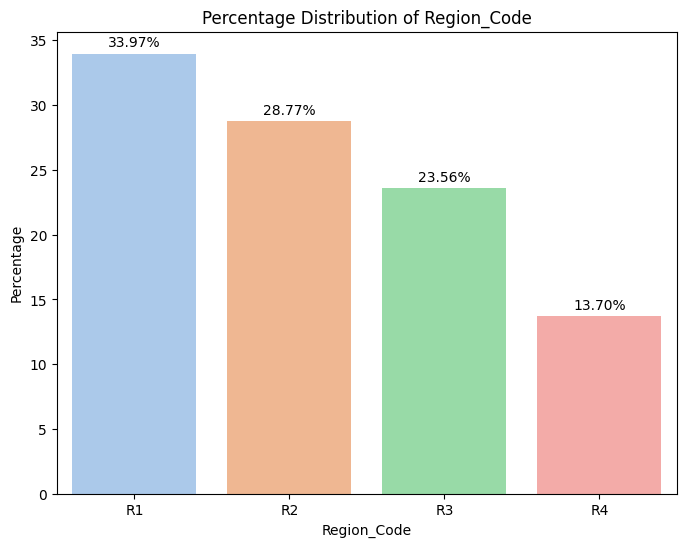

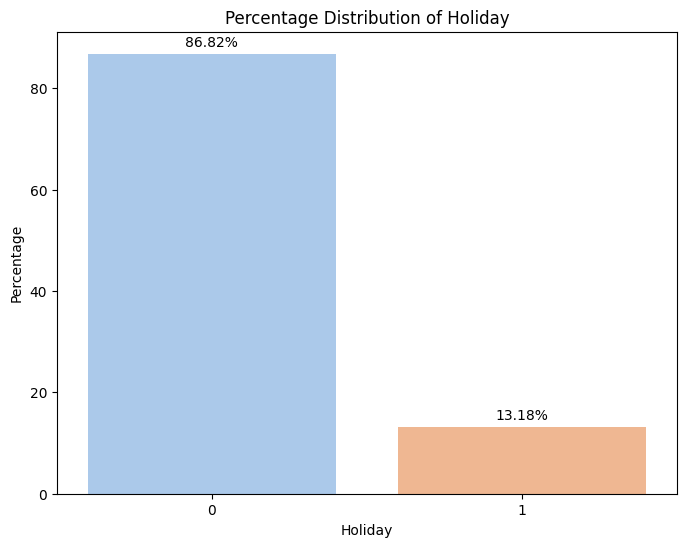

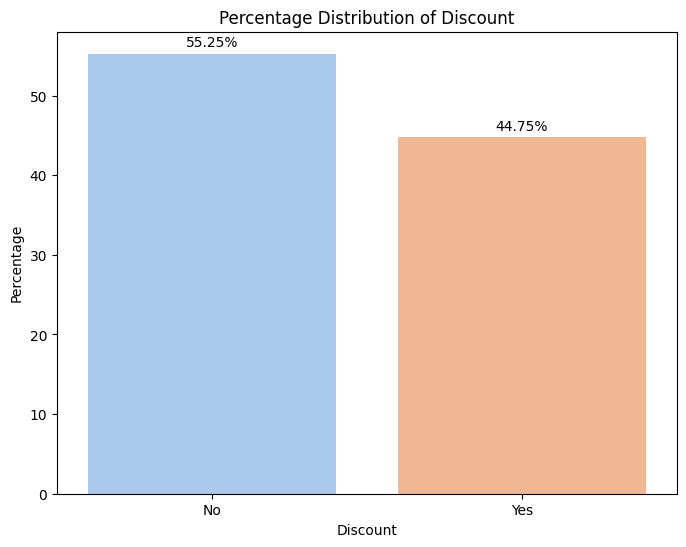

In [ ]:
# List of categorical columns
categorical_cols = ['Store_Type', 'Location_Type', 'Region_Code', 'Holiday', 'Discount']

# Plot bar charts
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    percent_data_x = df[col].value_counts(normalize=True).index
    percent_data_y = round(df[col].value_counts(normalize=True)*100,2).values


    # Plot
    ax = sns.barplot(x=percent_data_x, y=percent_data_y, palette='pastel')
    # Add labels using bar_label
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=3)

    plt.title(f'Percentage Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.show(

    )


Insights:
1. Store_id
  * 365 unique store IDs, each contributing 0.27% of the data.

  * Distribution is uniform — suggests equal data logging across all stores.

2. Store_Type
  * 4 unique values - S1, S2, S3 and S4.

  * S1 stores dominate, nearly half the dataset.


3. Location_Type

  * 5 unique values - L1, L2, L3, L4 and L5.
  * L1 is the most common location type.

  * L4 and L5 are underrepresented.

4.  Region_Code
  * 4 unique values - R1, R2, R3 and R4.
  * Region spread is slightly skewed toward R1, but still fairly balanced.

5.  Holiday

  * Most transactions are on non-holidays.


6.  Discount
  * Slightly skew toward no-discount entries.



<Axes: xlabel='Sales', ylabel='Count'>

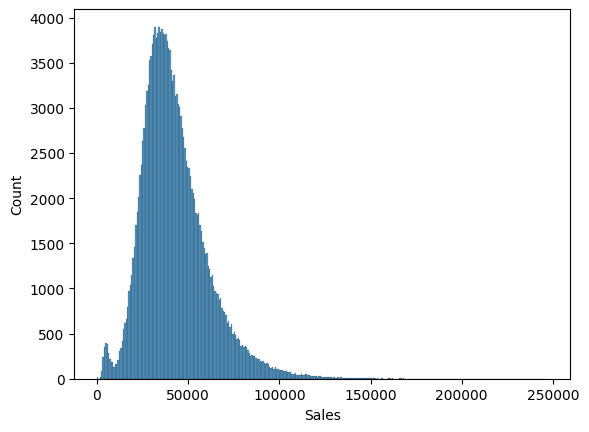

In [ ]:
sns.histplot(df["Sales"])

Insights:
* The histogram indicates that Sales is right-skewed, with a long tail.

* Most sales are clustered between 20,000 to 60,000, but a few values reach beyond 200,000.



<Axes: ylabel='Sales'>

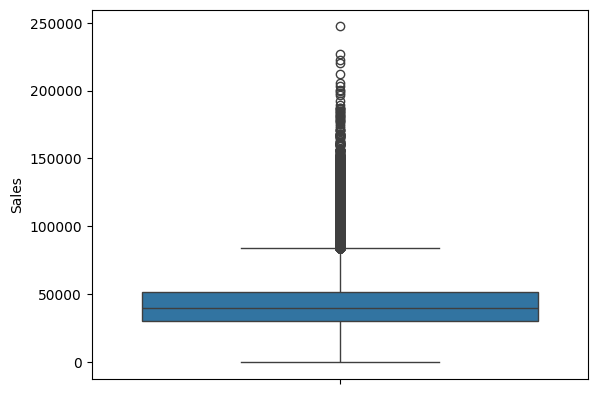

In [ ]:
sns.boxplot(df["Sales"])

<Axes: xlabel='No_of_orders', ylabel='Count'>

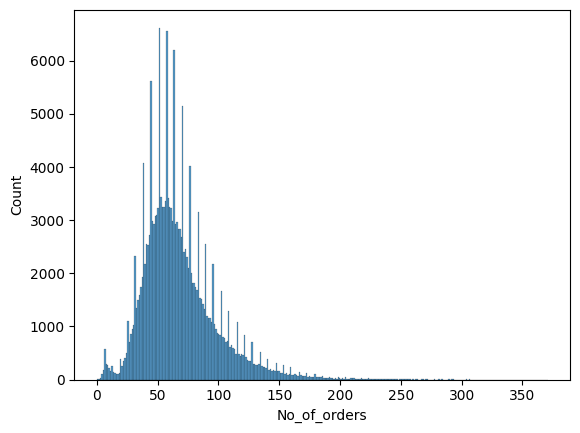

In [ ]:
sns.histplot(df["No_of_orders"])

<Axes: ylabel='Sales'>

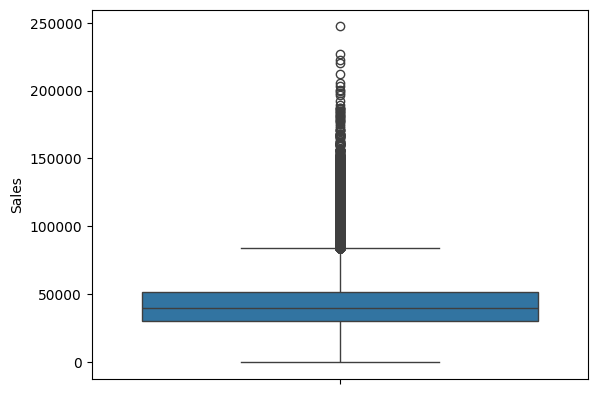

In [ ]:
sns.boxplot(y= df["Sales"])

Insights:
* The box plot clearly shows a high number of outliers beyond the upper whisker.

* These outliers are substantially higher than the rest of the data.

## Bivariate Analysis

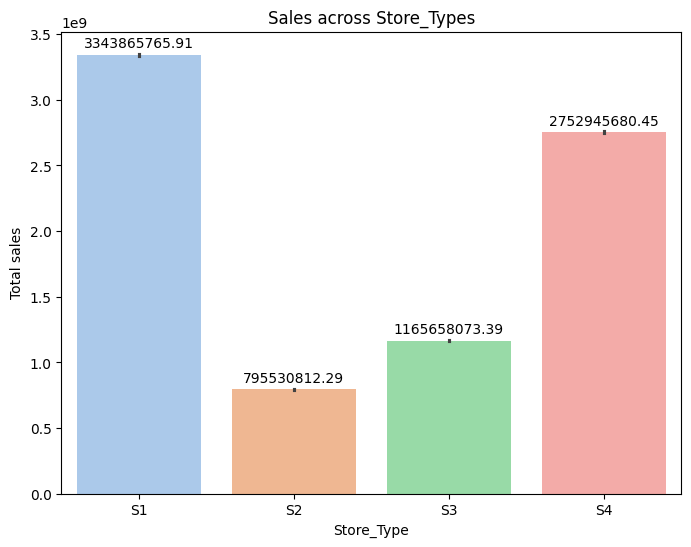

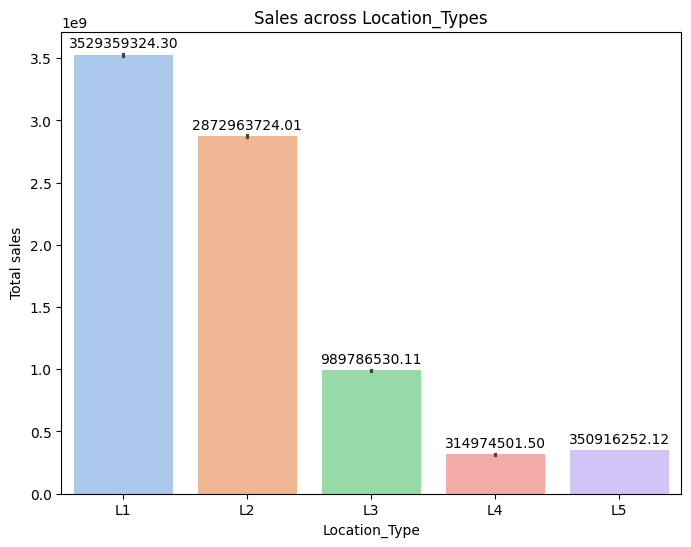

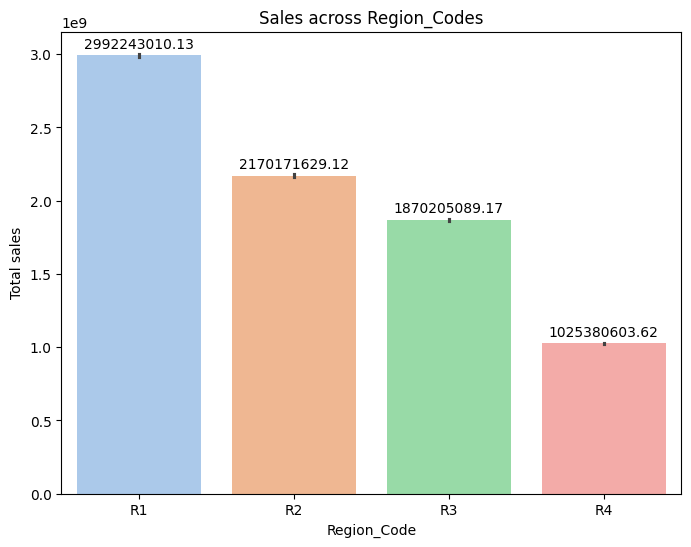

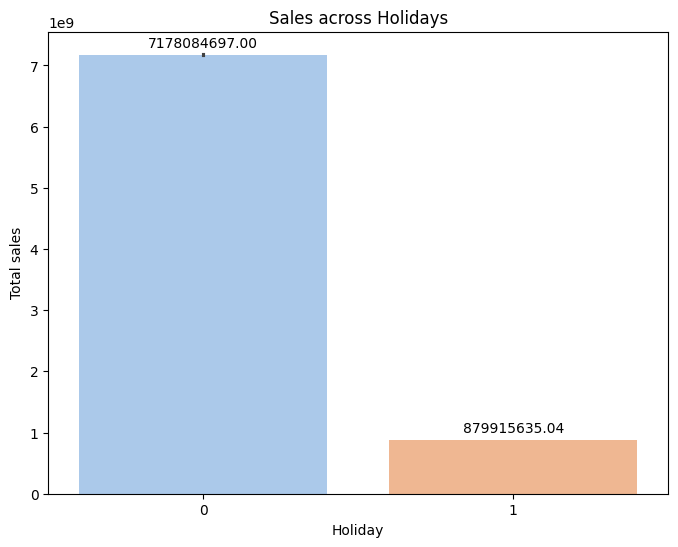

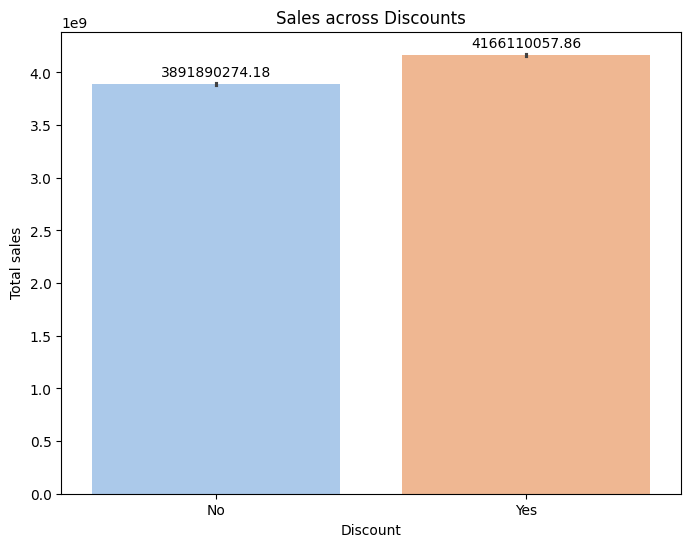

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))

    ax = sns.barplot(x=df[col], y= df['Sales'],estimator="sum", palette='pastel')

    # Add labels using bar_label
    for container in ax.containers:
        ax.bar_label(container, fmt='%0.2f', label_type='edge', padding=3)

    plt.title(f'Sales across {col}s')
    plt.xlabel(col)
    plt.ylabel('Total sales')
    plt.show()


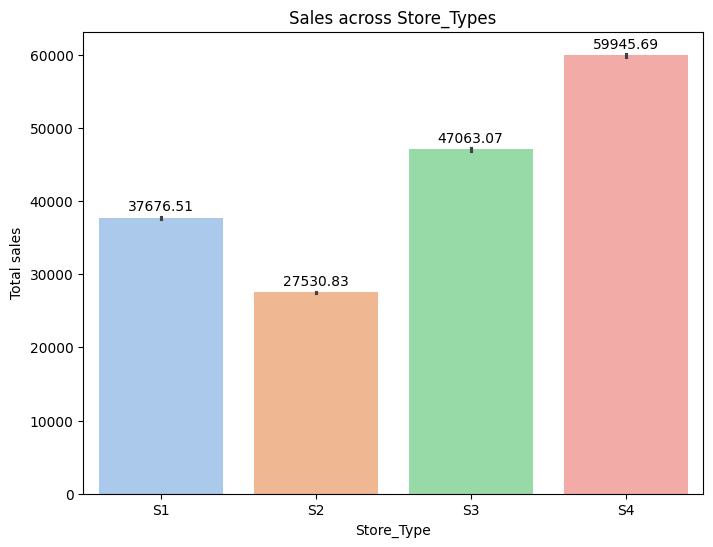

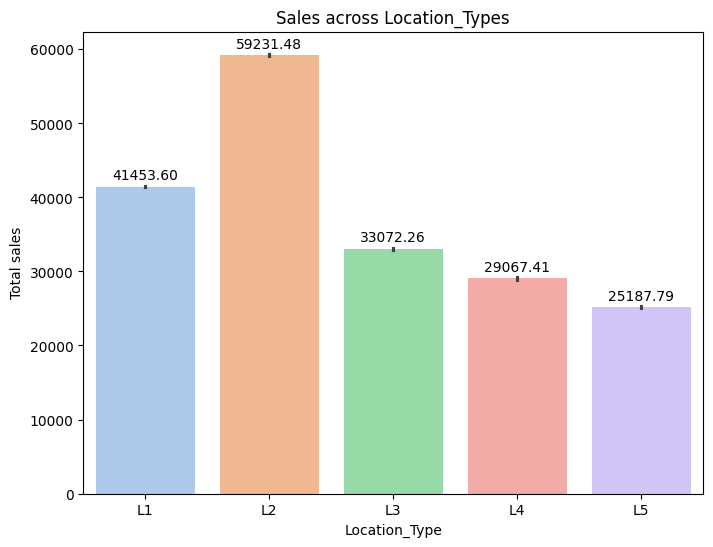

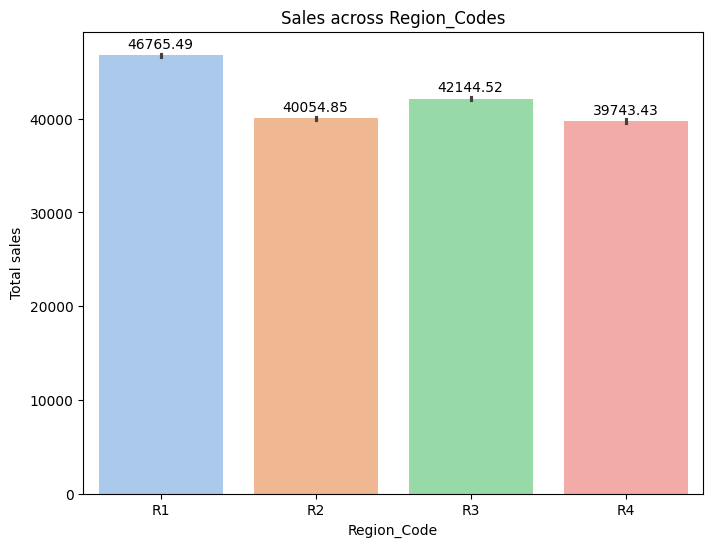

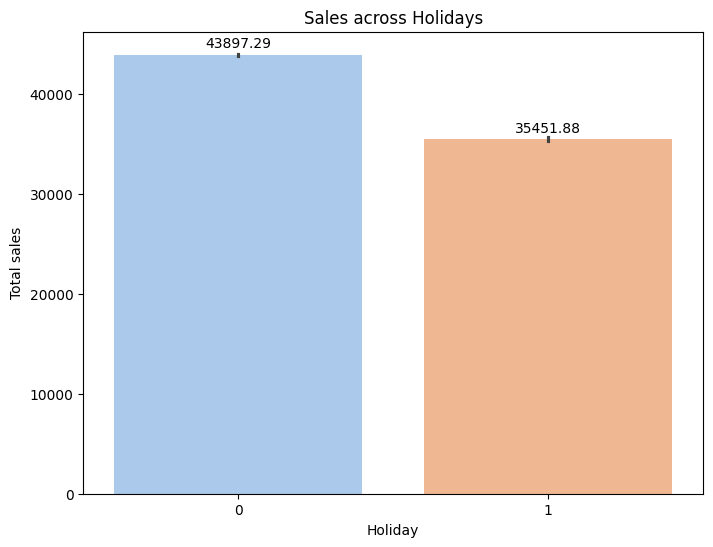

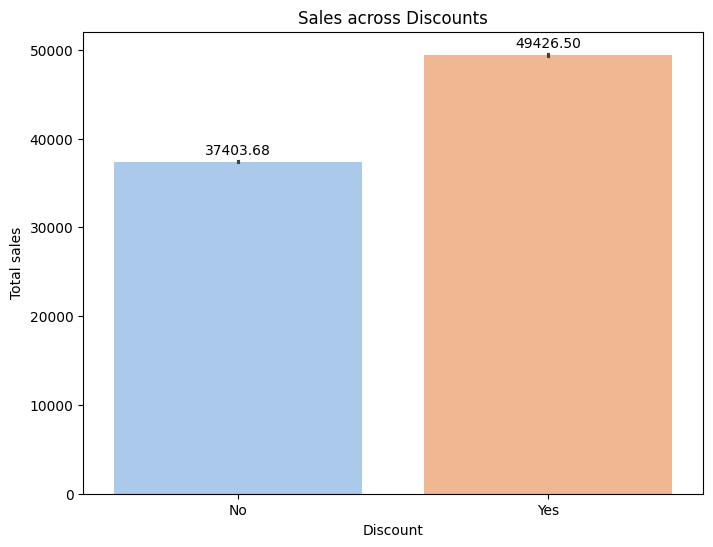

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))

    ax = sns.barplot(x=df[col], y= df['Sales'], palette='pastel')

    # Add labels using bar_label
    for container in ax.containers:
        ax.bar_label(container, fmt='%0.2f', label_type='edge', padding=3)

    plt.title(f'Sales across {col}s')
    plt.xlabel(col)
    plt.ylabel('Total sales')
    plt.show()


Insights:

1. Store_Type
Distribution:

  * S1 dominates (47.12%), followed by S4 (24.38%), S2 (15.34%), and S3 (13.15%).

  * Highest from S1 (₹3.34B), followed by S4 (₹2.75B).

  * Average Sales per Record: Highest for S4 (₹59.9K), then S3 (₹47K), and lowest for S2 (~₹27.5K).


    S4 stores are fewer but highly productive. S1 has volume advantage but lower per-record sales.
  
2. Location_Type
Distribution:

  * Most common: L1 (45.21%), then L2 (25.75%).

  * Total Sales highest in L1 (₹3.53B) and L2 (₹2.87B).

  * Average Sales per Record: Highest in L2 (₹59.2K), lowest in L5 (₹25.2K).

    
    L2 is highly efficient with fewer entries but higher sales per entry.*

3. Region_Code
Distribution:

  * R1 (33.97%) leads, followed by R2, R3, and R4.

  * Total Sales highest from R1 (~₹2.99B).

  * Average Sales is highest for R1 (~₹46.7K), followed closely by R3 and R2.
    
    
    R1 leads both in volume and efficiency.

4. Holiday
Distribution:

  * Non-holiday days: 86.82%, Holiday days: 13.18%.

  * Total Sales: Most sales happen on regular days (~₹7.18B).

  * Average Sales per Record: Sales drop on holidays (~₹35.4K vs. ₹43.9K on regular days).


    Holidays negatively impact sales performance.

5. Discount
Distribution:

  * No Discount (55.25%), Discount (44.75%).

  * Total Sales isHigher sales when discount is applied (~₹4.17B vs. ₹3.89B).

  * Average Sales per record are significantly higher with discounts (~₹49.4K vs. ₹37.4K).


    Discounts strongly boost both total and average sales.

## feature engg

In [ ]:
df["Month"] = df['Date'].dt.month_name()
df["Month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [ ]:
df["Year"] = df["Date"].dt.year
df["Year"].unique()

array([2018, 2019], dtype=int32)

In [ ]:
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday
df['Weekday'] = df['Weekday'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

<Axes: xlabel='Date', ylabel='Sales'>

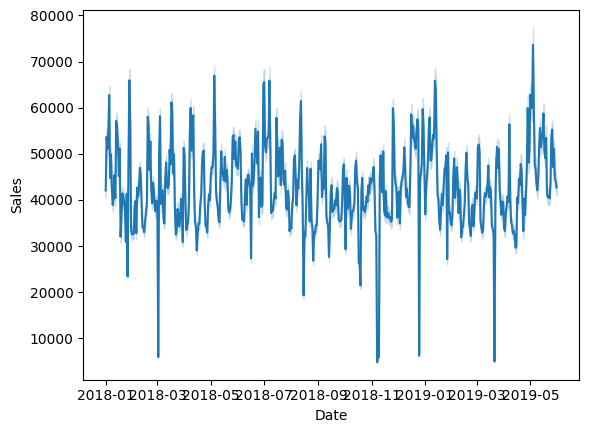

In [ ]:
sns.lineplot(x='Date', y='Sales', data=df)

In [ ]:
monthly_sales = df.set_index('Date').resample('M')['Sales'].sum()

plt.figure(figsize=(10, 4))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

**Annual Seasonality is observed.**

In [ ]:
df.groupby("Weekday").Sales.sum()

In [ ]:
df.groupby("Weekday").Sales.mean()

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Weekday', y='Sales', data=df, estimator='mean', palette='pastel',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Sales by Day of Week')
plt.ylabel('Avg Sales')
plt.xticks(rotation=30
           )
plt.tight_layout()
plt.show()

Insights:
* Sunday is the best performing day both in volume and average order value.

* Saturday also shows high activity — the weekend clearly drives sales.

* Weekdays (Mon–Fri) are relatively stable, but Friday lags behind.

* Thursday–Friday might be potential opportunities for promotional boosts.

In [ ]:
df["AOV"] = df["Sales"]/df["No_of_orders"]

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='No_of_orders', y='Sales', data=df,color= "orange")
plt.title('Sales vs. No of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [ ]:
correlation = df['No_of_orders'].corr(df['Sales'])
print(f"Correlation between No_of_orders and Sales: {correlation:.2f}")

Insights:

* There is a strong positive linear correlation between number of orders and sales (as expected).

* A linear trendline fits well, but some dispersion at high volumes may suggest inconsistent AOVs at scale.

* Sales forecasting models can use No_of_orders as a strong predictor.

In [ ]:
sns.histplot(df['AOV'], bins=30, kde=True)
plt.title('Distribution of Average Revenue per Order')

Insights:

* The distribution is approximately normal with a slight right skew.

* Most orders have an AOV between 550 and 700, peaking around 600.

* A few outliers exist with AOV above 1000, which may represent premium product sales or anomalies.


    Target the segment with AOV above 800 for potential upselling or loyalty programs.

In [ ]:
sns.boxplot(x='Region_Code', y='AOV', data=df)
plt.title('Average Revenue per Order by Region')


Insights:

* Region R4 has the highest median AOV, followed by R3, R2, and R1.

* All regions show a high spread and presence of outliers, especially on the upper side.


    R4 could be a high-income or premium market, suitable for targeted marketing or new product launches.

In [ ]:
sns.scatterplot(x='Discount', y='AOV', data=df)
plt.title('Discount vs. Avg Revenue per Order')

Insights:

* Both Discount = Yes and No groups have a wide range of AOV values.

* There is no clear visual difference in AOV distribution between discount and non-discount cases.

## Trivariate Analysis

In [ ]:
mean_sales = df.groupby(['Discount', 'Store_Type'])['Sales'].mean()
mean_sales

In [ ]:
normalized = mean_sales / mean_sales.sum()
normalized

In [ ]:
normalized = df.groupby(['Discount', 'Store_Type'])['Sales'].mean()
normalized = normalized / normalized.sum()
normalized_pivot = normalized.reset_index().pivot_table(
    index='Store_Type',
    columns='Discount',
    values='Sales'
)
normalized_pivot

Insights:
* Discounted sales contribute more across all store types. Total contribution of "Yes" rows ≈ 57% and "No" rows ≈ 43%. This suggests discounts significantly boost average sales per transaction.

* Even without discounts, S4 > S3 > S1 > S2 in terms of average sales.
* Discounts boost every store type, especially S4 and S3.
* S2 has lowest contribution overall, even with discounts.



In [ ]:
total_sales = df['Sales'].sum()
total_sales

In [ ]:
total_store_sales = df.groupby('Store_id')['Sales'].sum().sort_values(ascending=False)
total_store_sales.head()

In [ ]:
df.columns

In [ ]:
df[df['Store_id'].isin([175, 337, 126, 312, 146])]["Store_Type"].unique()

In [ ]:
df[df['Store_id'].isin([175, 337, 126, 312, 146])]["Location_Type"].unique()

In [ ]:
df[df['Store_id'].isin([175, 337, 126, 312, 146])]["AOV"].mean()

In [ ]:
df[df['Store_id'].isin([175, 337, 126, 312, 146])]["Region_Code"].unique()

In [ ]:
# Compare average sales across all S4 stores by location
print(df[df['Store_Type'] == 'S4'].groupby('Location_Type')['Sales'].mean())

# Region-wise distribution of S4 L2 stores
df[(df['Store_Type'] == 'S4') & (df['Location_Type'] == 'L2')]['Region_Code'].value_counts()


In [ ]:
pivot_table = df.pivot_table(
    values='Sales',
    index='Store_Type',
    columns='Location_Type',
    aggfunc='mean'
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f")
plt.title("Average Sales by Store Type and Location Type")
plt.ylabel("Store Type")
plt.xlabel("Location Type")
plt.show()

1. All Top 5 Stores

  * Belong to Store_Type = S4
  * Located in Location_Type = L2

2. L2 has significantly higher average sales for S4 stores compared to L1.

3. Region R1 dominates in terms of the number of S4–L2 stores.

4.  L3, L4, and L5 locations are low sales location. These locations do not have S4 stores. L4 and L5 do not have s3 stores too.

In [ ]:
total_store_sales.tail()

## Hypothesis Testing

Hypothesis: Stores offering discounts will have significantly higher sales than stores not offering discounts.

* Null Hypothesis (H₀): There is no significant difference in mean sales between stores offering discounts and those not offering discounts.

* Alternative Hypothesis (H₁): Stores offering discounts have significantly higher sales than those not offering discounts.

In [ ]:
from scipy.stats import ttest_ind

# Split the data
sales_discount = df[df['Discount'] == 'Yes']['Sales']
sales_no_discount = df[df['Discount'] == 'No']['Sales']

# Run independent t-test
t_stat, p_value = ttest_ind(sales_discount, sales_no_discount, equal_var=False)  # 2 sample t-test welch test

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")


p-value is 0 < 0.05 , hence Null hypothesis is rejected.

     Stores offering discounts have significantly higher sales than those not offering discounts.



In [ ]:

store_types = df['Store_Type'].unique()

for store in store_types:
    sales_discount = df[(df['Discount'] == 'Yes') & (df['Store_Type'] == store)]['Sales']
    sales_no_discount = df[(df['Discount'] == 'No') & (df['Store_Type'] == store)]['Sales']

    t_stat, p_val = ttest_ind(sales_discount, sales_no_discount, equal_var=False)

    print(f"\nStore Type: {store}")
    print(f"T-statistic = {t_stat:.3f}, P-value = {p_val:.5f}")


p-value is 0 < 0.05 for all Store_types , hence Null hypothesis is rejected for all Store_types.

     Stores offering discounts have significantly higher sales than those not offering discounts.



Effect of Holidays on Sales:

Hypothesis: Sales on holidays are higher compared to non-holidays.

* Null Hypothesis (H₀): There is no difference in average sales between holidays and non-holidays.

* Alternative Hypothesis (H₁): Average sales on holidays are significantly different than on non-holidays.

In [ ]:

# Separate sales data
holiday_sales = df[df['Holiday'] == 1]['Sales']
non_holiday_sales = df[df['Holiday'] == 0]['Sales']

# Perform Welch's t-test (doesn't assume equal variance)
t_stat, p_val = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

''' Use Welch’s t-test (equal_var=False) when:
We’re not sure if the two groups have equal variance.

Group sizes are very different (e.g., more non-holiday days than holiday days).'''

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")


p-value is 0< 0.5, hence null hpothesis is rejected.  

    Average sales on holidays are significantly different than on non-holidays.

In [ ]:
t_stat, p_val = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False, alternative='greater')
t_stat, p_val

p-value is 1 > 0.5, hence null hpothesis is  not rejected.

    Average sales on holidays are no higher than on non-holidays.

In [ ]:
t_stat, p_val = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False, alternative='less')
t_stat, p_val

p-value is 0< 0.5, hence null hpothesis is rejected.

    Average sales on holidays are significantly lower than on non-holidays.

In [ ]:
from scipy.stats import shapiro

Store_Type_sales = {}

for s in df["Store_Type"].unique():
    print(f"\nStore_Type_{s}")
    Store_Type_sales[f"Store_Type{s}"] = df[df["Store_Type"] == s]["Sales"]
    stat, p = shapiro(Store_Type_sales[f"Store_Type{s}"][:2000])  # sample if needed
    print(f"W-stat: {stat:.4f} | p-value: {p:.4f}")


In [ ]:
from scipy.stats import f_oneway

# Group sales by store type
grouped_sales_by_storetype = [group['Sales'].values for name, group in df.groupby('Store_Type')]

# Perform ANOVA
f_stat, p_val = f_oneway(*grouped_sales_by_storetype)

print("F-statistic:", f_stat)
print("p-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("Statistically significant difference in sales across store types.")
else:
    print("No significant difference in sales across store types.")


In [ ]:
from scipy.stats import kruskal

stat, p_value = kruskal(*grouped_sales_by_storetype)

print("Kruskal-Wallis H-statistic:", stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Significant difference in sales distributions among store types.")
else:
    print("No significant difference detected.")

Regional Sales Variability

Hypothesis: There is significant variability in sales across different regions.

* Null (H₀): Sales distribution is the same across all regions.

* Alternative (H₁): At least one region has a significantly different sales distribution.

In [ ]:
from scipy.stats import shapiro

region_sales = {}

for r in df["Region_Code"].unique():
    print(f"\nRegion_{r}")
    region_sales[f"Region_{r}"] = df[df["Region_Code"] == r]["Sales"]
    stat, p = shapiro(region_sales[f"Region_{r}"][:2000])  # sample if needed
    print(f"W-stat: {stat:.4f} | p-value: {p:.4f}")


In [ ]:
from scipy.stats import kruskal

grouped_sales_by_region = [group['Sales'].values for name, group in df.groupby('Region_Code')]
stat, p = kruskal(*grouped_sales_by_region)
print(f"Kruskal-Wallis H-stat: {stat:.4f} | p-value: {p:.4f}")

p-value is 0.0 indicates a highly significant difference in sales distributions across regions. Since the p-value is far below 0.05, we reject the null hypothesis — i.e., at least one region differs significantly in sales.

In [ ]:
!pip install scikit-posthocs

In [ ]:
import scikit_posthocs as sp
import pandas as pd

# Run Dunn's test for Sales grouped by Region_Code
dunn_result = sp.posthoc_dunn(df, val_col='Sales', group_col='Region_Code', p_adjust='bonferroni')

# Display result
print(dunn_result)


Insights:
* R1 and R3 are highly different from all other regions.

* R2 and R4 are not significantly different (p = 0.8422) — they behave similarly in terms of sales.

* R3 is significantly different from all.

In [ ]:
df.columns


In [ ]:
# Check normality
stat_order, p_order = shapiro(df['No_of_orders'])
stat_sales, p_sales = shapiro(df['Sales'])

print(f"No_of_orders p-value: {p_order:.4f}")
print(f"Sales p-value: {p_sales:.4f}")

In [ ]:
from scipy.stats import spearmanr

corr_coef, p_value = spearmanr(df['No_of_orders'], df['Sales'])
print(f"Spearman correlation coefficient: {corr_coef:.4f}, p-value: {p_value:.4f}")

Insights:

* The correlation is very strong and positive: as the number of orders increases, sales also increase sharply.

* The p-value = 0.0000 indicates this relationship is statistically significant.